In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set()

In [2]:
df=pd.read_csv(r'train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#statistical summary of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

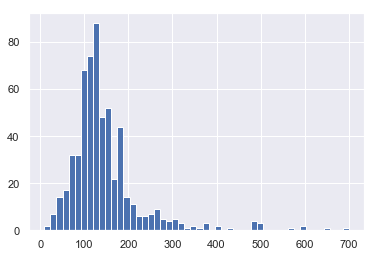

In [12]:
df['LoanAmount'].hist(bins=50)

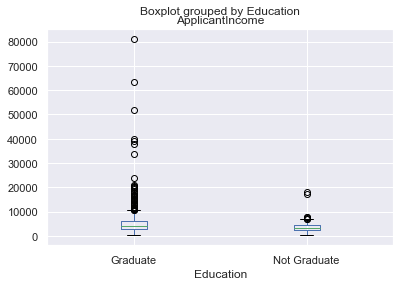

In [17]:
df.boxplot(column='ApplicantIncome',by='Education')

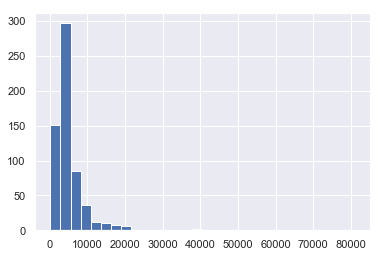

In [20]:
df['ApplicantIncome'].hist(bins=30)

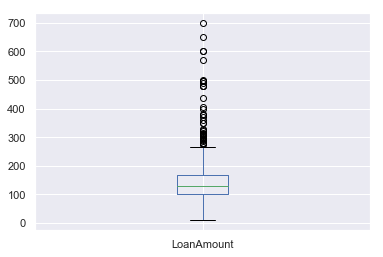

In [21]:
df.boxplot(column='LoanAmount')

In [26]:
#looking at pivot tables to identify important variables
table1=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc= lambda x: x.map({'Y':1,'N':0}).mean())

In [27]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [46]:
print('Probability of getting loan:') 
print(table1)

Probability of getting loan:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [42]:
table2=pd.crosstab(df['Gender'],df['Loan_Status'],margins=True).apply(convert_to_perc,axis=1)

In [43]:
table2

Loan_Status,N,Y,All
Gender,,,
Female,0.330357,0.669643,1.0
Male,0.306748,0.693252,1.0
All,0.311148,0.688852,1.0


In [39]:
def convert_to_perc(data):
    return data/float(data[-1])

In [49]:
pd.crosstab(df['Education'],df['Loan_Status'],margins=True).apply(convert_to_perc,axis=1)

Loan_Status,N,Y,All
Education,,,
Graduate,0.291667,0.708333,1.0
Not Graduate,0.388060,0.611940,1.0
All,0.312704,0.687296,1.0


In [50]:
pd.crosstab(df['Married'],df['Loan_Status'],margins=True).apply(convert_to_perc,axis=1)

Loan_Status,N,Y,All
Married,,,
No,0.370892,0.629108,1.0
Yes,0.283920,0.716080,1.0
All,0.314239,0.685761,1.0


In [51]:
pd.crosstab(df['Self_Employed'],df['Loan_Status'],margins=True).apply(convert_to_perc,axis=1)

Loan_Status,N,Y,All
Self_Employed,,,
No,0.314000,0.686000,1.0
Yes,0.317073,0.682927,1.0
All,0.314433,0.685567,1.0


In [52]:
df.apply(lambda x : x.isnull().sum(),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
pd.crosstab(df['Dependents'],df['Loan_Status'],margins=True).apply(convert_to_perc,axis=1)

Loan_Status,N,Y,All
Dependents,,,
0,0.310145,0.689855,1.0
1,0.352941,0.647059,1.0
2,0.247525,0.752475,1.0
3+,0.352941,0.647059,1.0
All,0.310518,0.689482,1.0


df.boxplot(column='LoanAmount',by=['Education','Married'],figsize=(12,10))

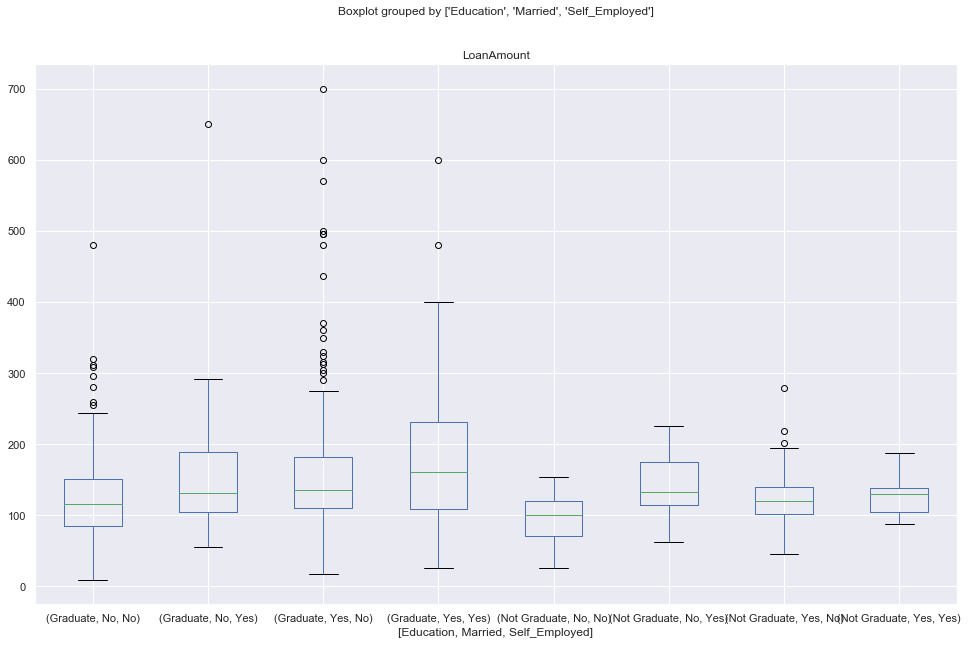

In [65]:
df.boxplot(column='LoanAmount',by=['Education','Married','Self_Employed'],figsize=(16,10))

In [70]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [71]:
#dealing with missing values
df['Self_Employed'].fillna('No',inplace=True)
df['Married'].fillna('No',inplace=True)

In [83]:
table3=df.pivot_table(values='LoanAmount',index=['Education'],columns=['Self_Employed'],aggfunc=np.mean)

In [84]:
table3

Self_Employed,No,Yes
Education,,
Graduate,149.724566,182.241935
Not Graduate,115.900000,134.647059


In [85]:
def find_in_table(x):
    return table3.loc[x['Education'],x['Self_Employed']]

In [86]:
#replace missing values in loanamount according to 'Education' and 'Self_Employed'
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(find_in_table,axis=1),inplace=True)


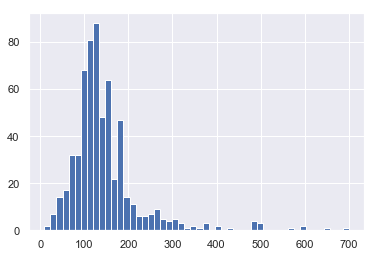

In [87]:
df['LoanAmount'].hist(bins=50)

In [88]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

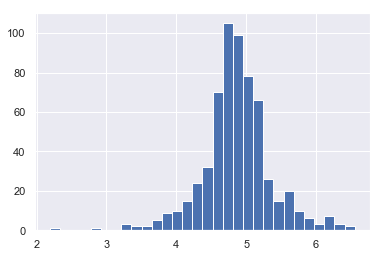

In [91]:
df['LoanAmount_log'].hist(bins=30)

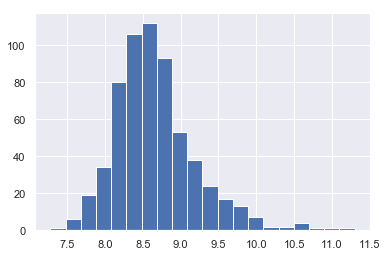

In [93]:
np.log((df['ApplicantIncome']+df['CoapplicantIncome'])).hist(bins=20)


In [94]:
df['TotalIncome_log']=np.log((df['ApplicantIncome']+df['CoapplicantIncome']))

In [95]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [97]:
cat_var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [98]:
for i in cat_var:
    df[i]=le.fit_transform(df[i])

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [126]:
def eval_model(model,x,y):
    model.fit(x,y)
    
    pred=model.predict(x)
    
    print('Training data accuracy')
    accuracy = metrics.accuracy_score(pred,y)
    print(accuracy)
    
    print('Cross validation score(k=5)')
    cv=cross_validate(model,x,y,cv=5)
    print(cv['test_score'])

In [127]:
#fit models and compare the results
model1=LogisticRegression()

In [128]:
x=np.column_stack((df['Credit_History'],df['Education'],df['Married'],df['LoanAmount_log'],df['TotalIncome_log']))
y=df['Loan_Status']

In [129]:
eval_model(model1,x,y)

Training data accuracy
0.8094462540716613
Cross validation score(k=5)
[0.81451613 0.76612903 0.78688525 0.86065574 0.81967213]


C:\Users\Pulkit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pulkit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pulkit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pulkit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pulkit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [131]:
model2=DecisionTreeClassifier()
eval_model(model2,x,y)

Training data accuracy
1.0
Cross validation score(k=5)
[0.71774194 0.65322581 0.7295082  0.77868852 0.7295082 ]


In [134]:
model3=RandomForestClassifier(n_estimators=50)
eval_model(model3,x,y)

Training data accuracy
0.996742671009772
Cross validation score(k=5)
[0.77419355 0.7016129  0.77868852 0.76229508 0.80327869]


In [137]:
x_new=np.column_stack((df['Credit_History'],df['Education'],df['LoanAmount_log'],df['TotalIncome_log']))
model4=RandomForestClassifier(n_estimators=50)
eval_model(model4,x_new,y)

Training data accuracy
1.0
Cross validation score(k=5)
[0.76612903 0.75806452 0.77868852 0.81147541 0.79508197]


In [ ]:
#model 3 gives the best result